In [2]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]


In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Create dummy variables
X=pd.get_dummies(X,drop_first=True)
X.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)#for train 
X_test = sc.transform(X_test)#for test data


In [6]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout




In [7]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
#relu prevents vanishing gradient problem
# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [ ]:
#if we are using ANN for dregression then do given below stuff
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [10]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 50)
# list all data in history

print(model_history.history.keys())


Epoch 1/50
536/536 [==============================] - 1s 2ms/step - loss: 0.7060 - accuracy: 0.6061 - val_loss: 0.5956 - val_accuracy: 0.7531
Epoch 2/50
536/536 [==============================] - 0s 768us/step - loss: 0.5827 - accuracy: 0.7641 - val_loss: 0.5383 - val_accuracy: 0.7895
Epoch 3/50
536/536 [==============================] - 0s 786us/step - loss: 0.5232 - accuracy: 0.7946 - val_loss: 0.5063 - val_accuracy: 0.7955
Epoch 4/50
536/536 [==============================] - 0s 782us/step - loss: 0.4792 - accuracy: 0.8042 - val_loss: 0.4863 - val_accuracy: 0.7955
Epoch 5/50
536/536 [==============================] - 0s 800us/step - loss: 0.4755 - accuracy: 0.7972 - val_loss: 0.4727 - val_accuracy: 0.7955
Epoch 6/50
536/536 [==============================] - 0s 787us/step - loss: 0.4617 - accuracy: 0.8003 - val_loss: 0.4629 - val_accuracy: 0.7959
Epoch 7/50
536/536 [==============================] - 0s 779us/step - loss: 0.4597 - accuracy: 0.7926 - val_loss: 0.4554 - val_accuracy: 0

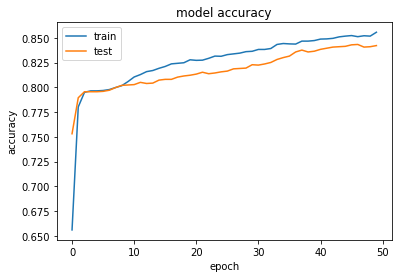

In [11]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



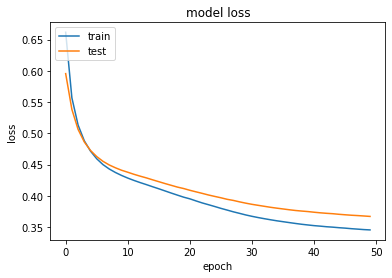

In [12]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [13]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

#if y>0.5 then true else false

In [15]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[1514,   81],
       [ 212,  193]], dtype=int64)

In [16]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8535

# Given code is for regression method

In [19]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [21]:
def build_model(hp):
    model=keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model.add(layers.Dense(units=hp.Int('units_'+str(i),min_value=32,max_value=512,step=32),activation='relu'))
    model.add(layers.Dense(1,activation='linear'))
    model.compile(
        optimizer=keras.optimizer.Adam(
            hp.choice('learning_rate',[1e-2,1e-3])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trails=5,
    execution_per_trail=3,
    directory='project1',
    project_name='AI index')


In [ ]:
tuner.search_space_summary()

# do the train test split

tuner.search(X_train,Y_train,epochs=5,validation_data=(X_test,y_test))

tuner.result_summary()